In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
from IPython.display import display, clear_output
from ipywidgets import interact, fixed, FloatSlider, FloatLogSlider, HBox, Layout, Output, VBox
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import beta as Beta
from scipy.stats import norm as Gaussian
import starry
from starry_gp.gp import YlmGP

starry.config.lazy = False
starry.config.quiet = True

In [4]:
ydeg = 10
map = starry.Map(ydeg)
map.render();
gp = YlmGP(ydeg)

/opt/anaconda3/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


In [15]:
def slider(minval, maxval, val, step, descr, height=480, log=False):
    if log:
        func = FloatLogSlider
        kwargs = {"base": np.exp(1)}
    else:
        func = FloatSlider
        kwargs = {}
    return func(
        min=minval,
        max=maxval,
        value=val,
        step=step,
        orientation="vertical",
        description=descr,
        continuous_update=False,
        layout=Layout(height="%dpx" % height, width="50px"),
        **kwargs
    )

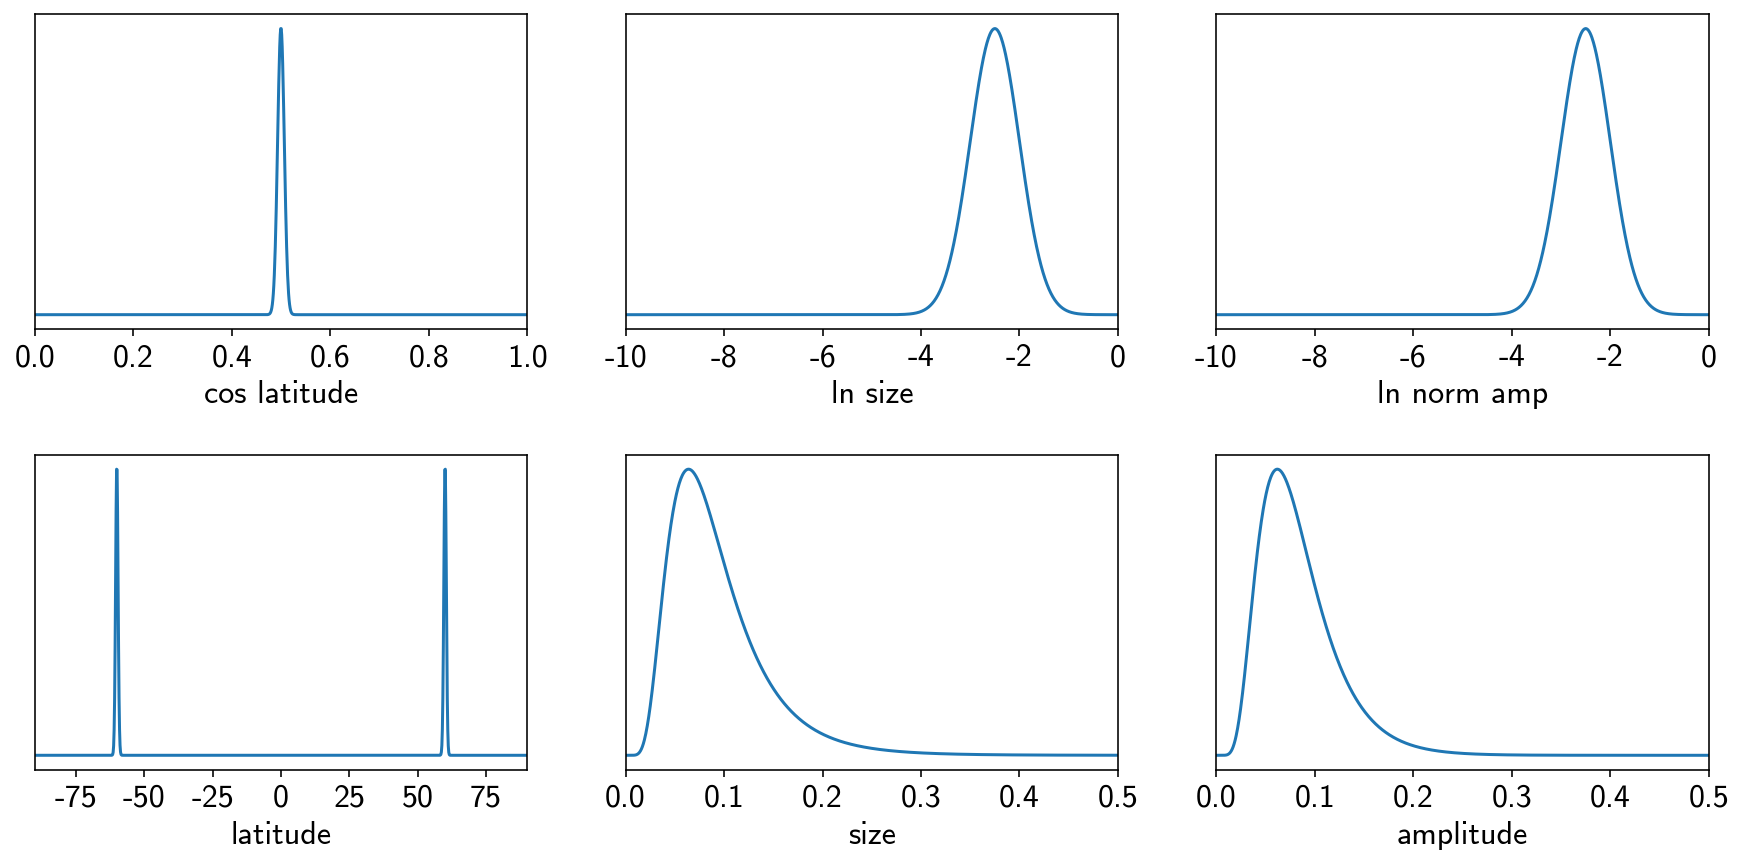

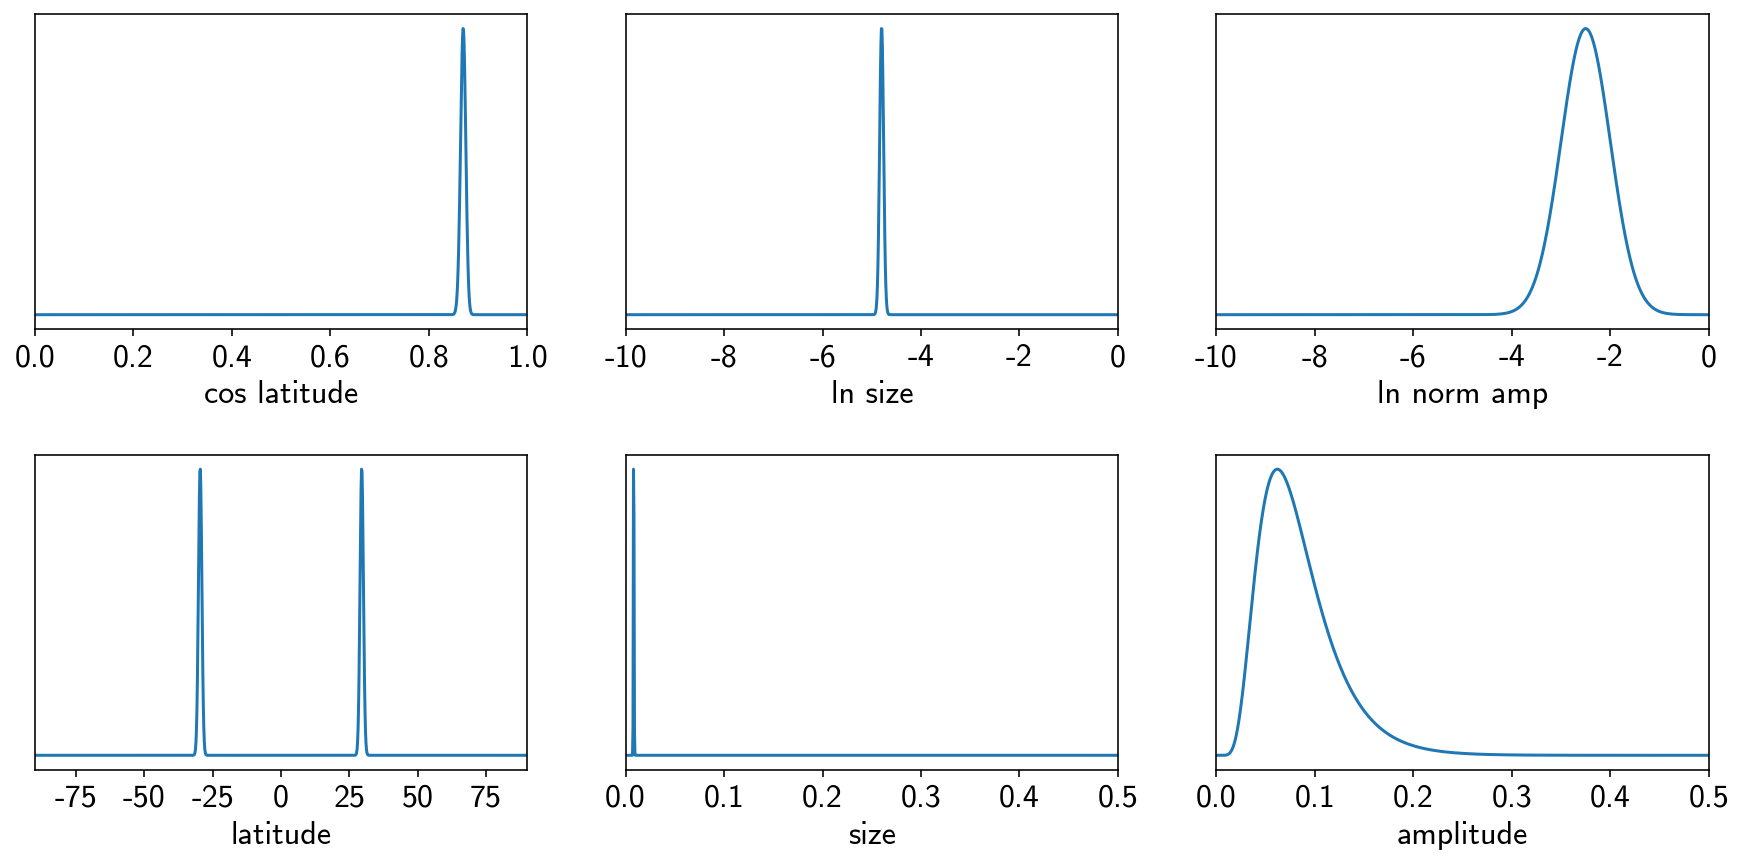

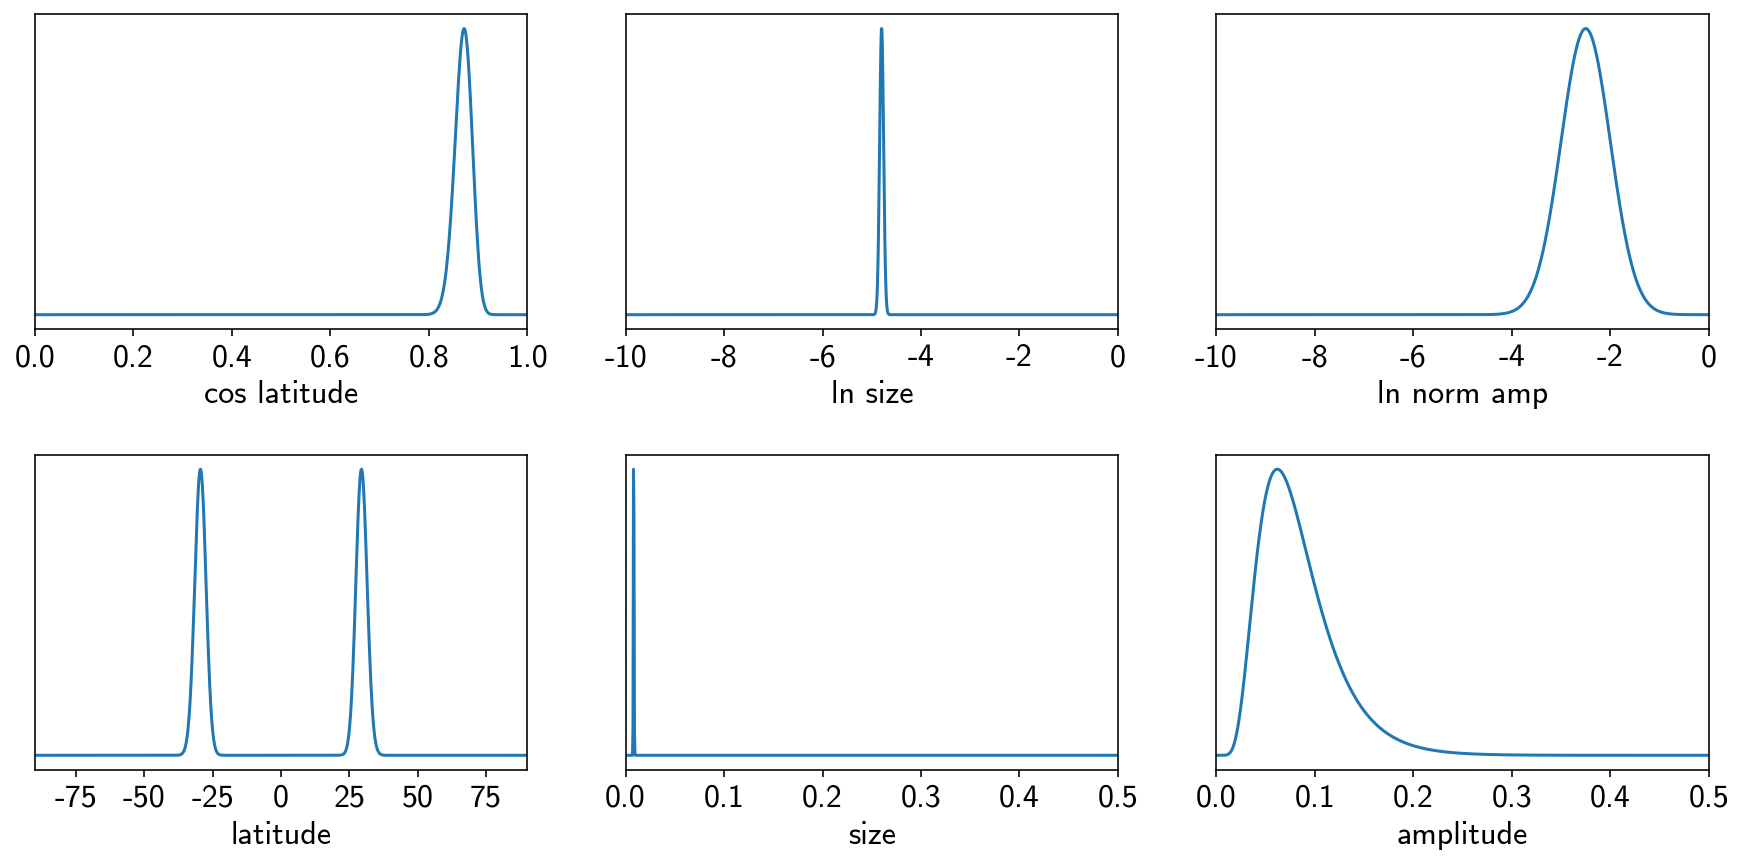

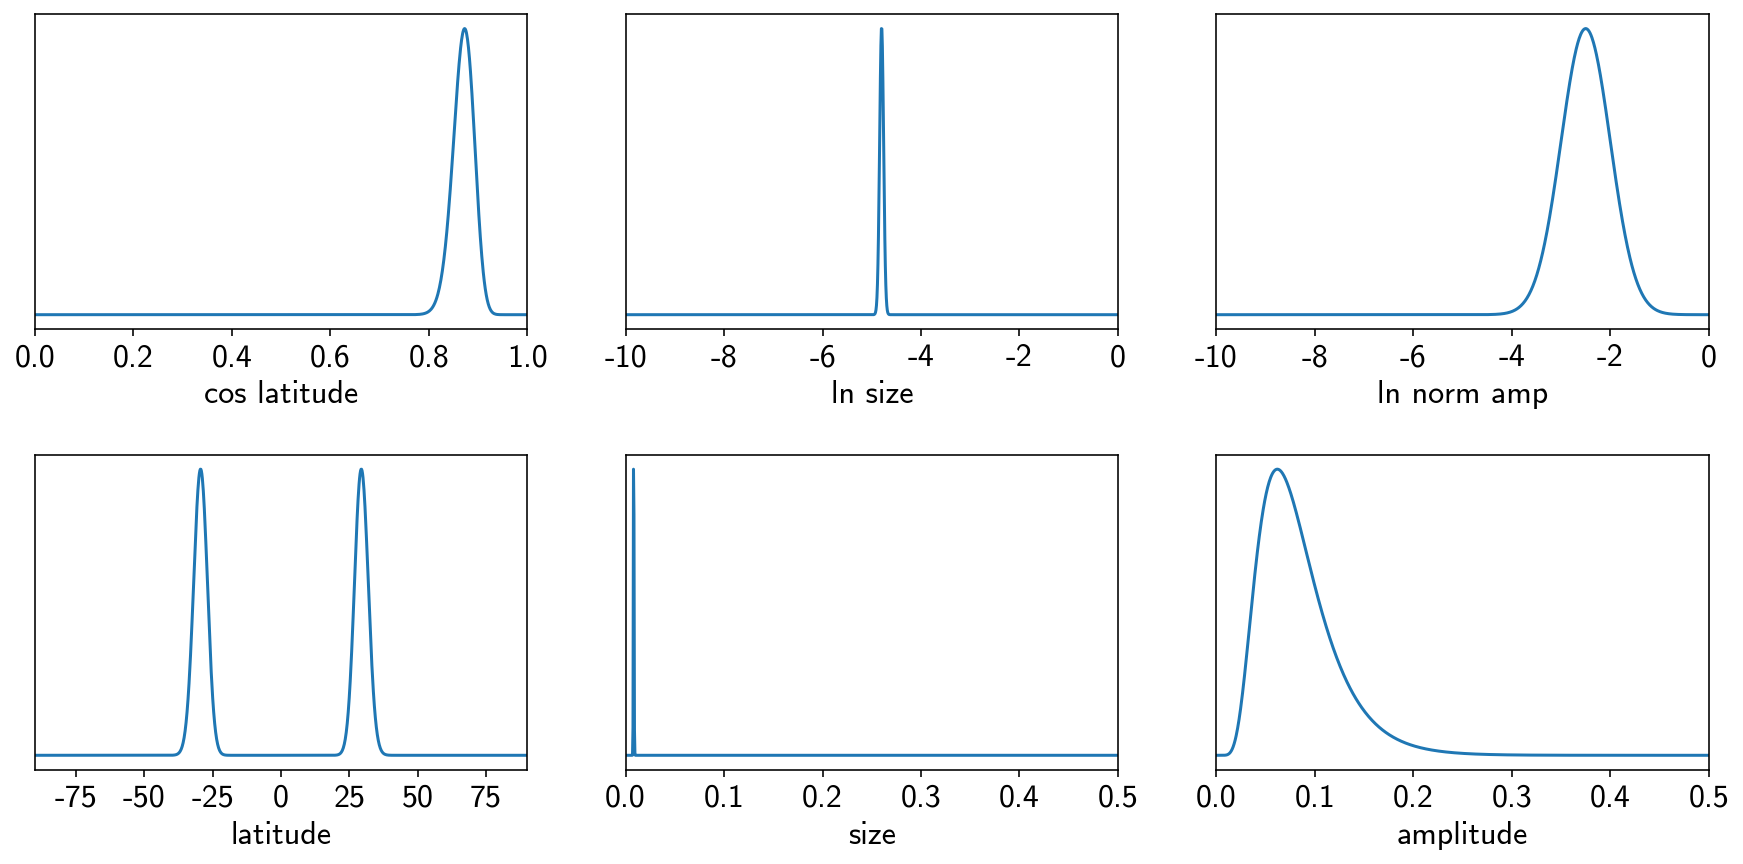

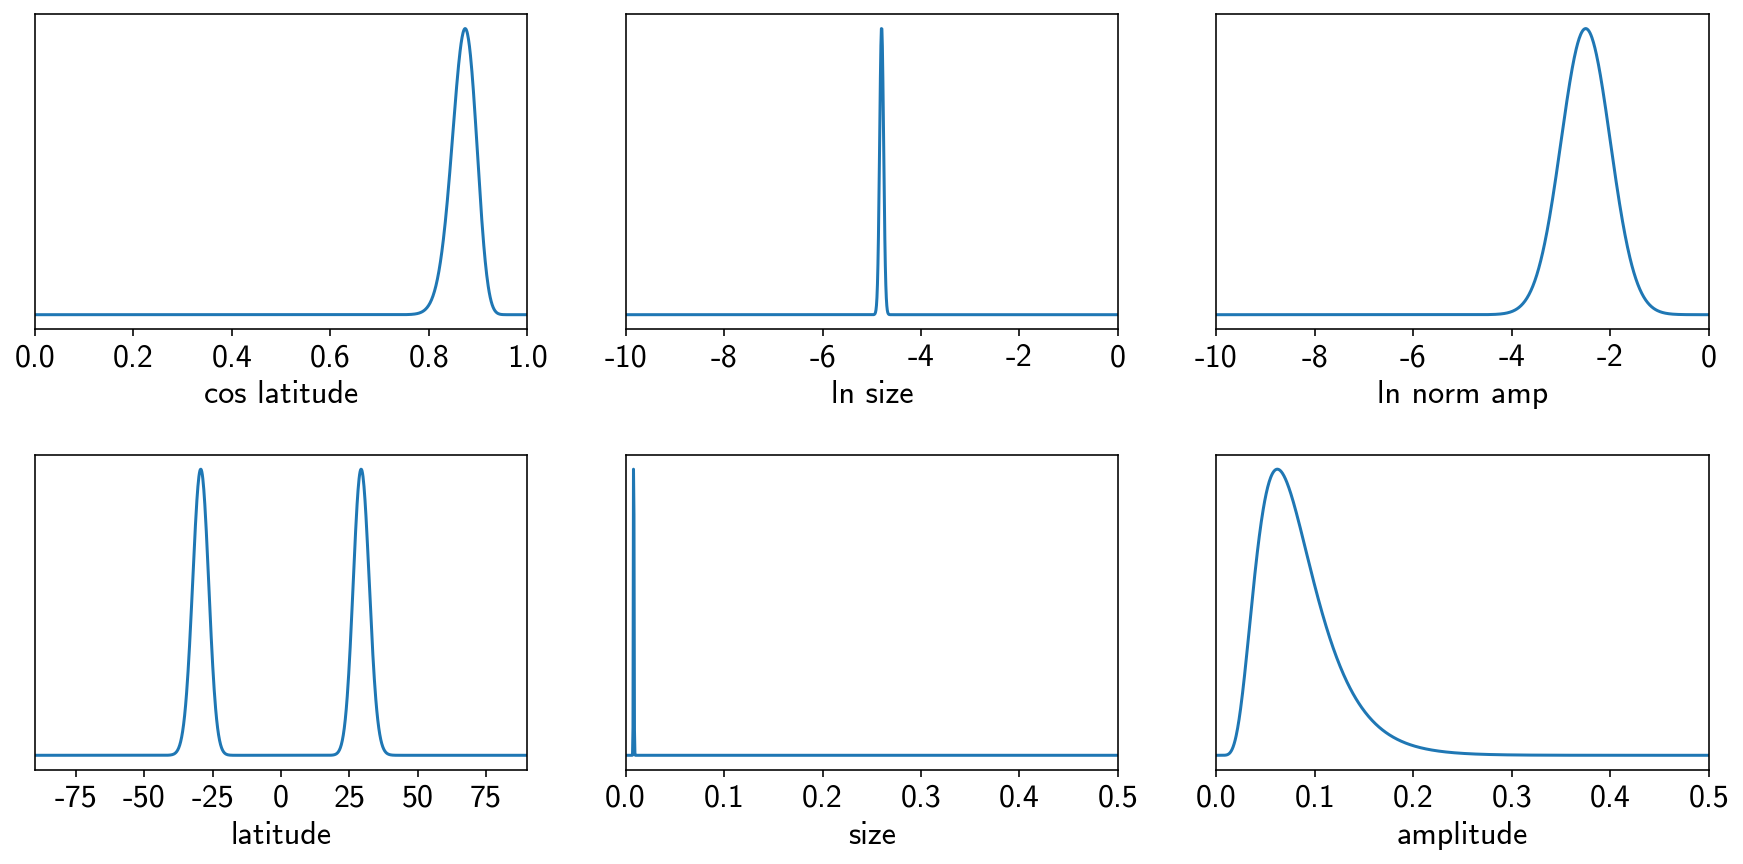

In [18]:
out = Output(layout={"width": "800px", "height": "500px"})
sl_beta1 = slider(0, 1, 0.5, 0.01, r"$\beta_1$")
sl_beta2 = slider(-10, 0, 0.01, 0.1, r"$\beta_2$", log=True)

sl_size1 = slider(-10, 0, -2.5, 0.1, r"$s_1$")
sl_size2 = slider(0, 1, 0.5, 0.01, r"$s_2$")

sl_amp1 = slider(-10, 0, -2.5, 0.1, r"$a_1$")
sl_amp2 = slider(0, 1, 0.5, 0.01, r"$a_2$")


def update_plot(change=None):

    with out:

        # Setup
        clear_output(wait=True)
        fig = plt.figure(figsize=(15, 11))
        fig.subplots_adjust(hspace=0.4)

        # --------------
        # -- latitude --
        # --------------

        b1 = min(max(1e-5, sl_beta1.value), 1 - 1e-5)
        b2 = min(sl_beta2.value, 1 - 1e-5)
        alpha = b1 * (1 / b2 - 1)
        beta = (1 - b1) * (1 / b2 - 1)

        # Transformed latitude
        ax1 = plt.subplot2grid((3, 3), (0, 0))
        cosphi = np.linspace(0, 1, 1000)
        ax1.plot(cosphi, Beta.pdf(cosphi, alpha, beta))
        ax1.set_xlim(0, 1)
        ax1.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: "%.1f" % x))
        ax1.set_xlabel("cos latitude", fontsize=16)
        ax1.set_yticks([])
        for tick in ax1.get_xticklabels():
            tick.set_fontsize(16)

        # Latitude
        ax2 = plt.subplot2grid((3, 3), (1, 0))
        phi = np.linspace(-90, 90, 1000)
        ax2.plot(
            phi,
            0.5
            * np.abs(np.sin(phi * np.pi / 180))
            * Beta.pdf(np.cos(phi * np.pi / 180), alpha, beta),
        )
        ax2.set_xlim(-90, 90)
        ax2.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: "%.1f" % x))
        ax2.set_xlabel("latitude", fontsize=16)
        ax2.set_yticks([])
        for tick in ax2.get_xticklabels():
            tick.set_fontsize(16)

        # --------------
        # ---- size ----
        # --------------

        s1 = sl_size1.value
        s2 = sl_size2.value

        # Transformed spot size
        ax3 = plt.subplot2grid((3, 3), (0, 1))
        lns = np.linspace(-10, 0, 1000)
        ax3.plot(lns, Gaussian.pdf(lns, s1, s2))
        ax3.set_xlim(-10, 0)
        ax3.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: "%.1f" % x))
        ax3.set_xlabel("ln size", fontsize=16)
        ax3.set_yticks([])
        for tick in ax3.get_xticklabels():
            tick.set_fontsize(16)

        # Spot size
        ax4 = plt.subplot2grid((3, 3), (1, 1))
        s = np.linspace(0, 0.5, 1000)
        ax4.plot(s, Gaussian.pdf(np.log(s), s1, s2) / s)
        ax4.set_xlim(0, 0.5)
        ax4.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: "%.1f" % x))
        ax4.set_xlabel("size", fontsize=16)
        ax4.set_yticks([])
        for tick in ax4.get_xticklabels():
            tick.set_fontsize(16)

        # ---------------
        # -- amplitude --
        # ---------------

        a1 = sl_amp1.value
        a2 = sl_amp2.value

        # Transformed amplitude
        ax5 = plt.subplot2grid((3, 3), (0, 2))
        x = np.linspace(-10, 0, 1000)
        ax5.plot(x, Gaussian.pdf(x, a1, a2))
        ax5.set_xlim(-10, 0)
        ax5.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: "%.1f" % x))
        ax5.set_xlabel("ln norm amp", fontsize=16)
        ax5.set_yticks([])
        for tick in ax5.get_xticklabels():
            tick.set_fontsize(16)

        # Spot amplitude
        ax6 = plt.subplot2grid((3, 3), (1, 2))
        a = np.linspace(0, 0.5, 1000)
        ax6.plot(a, Gaussian.pdf(-np.log(1 / a - 1), a1, a2) / (a - a ** 2))
        ax6.set_xlim(0, 0.5)
        ax6.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: "%.1f" % x))
        ax6.set_xlabel("amplitude", fontsize=16)
        ax6.set_yticks([])
        for tick in ax6.get_xticklabels():
            tick.set_fontsize(16)

            
        # 
        #
        #
        
        gp.set_params(b1, b2, s1, s2, a1, a2)
        y = np.vstack((gp.mu, gp.draw(2)))
        for k in range(3):
            ax_ = plt.subplot2grid((3, 3), (2, k))
            map[1:, :] = y[k]
            map.show(ax=ax_, projection="moll")
        
        plt.show()


sl_beta1.observe(update_plot, "value")
sl_beta2.observe(update_plot, "value")
sl_size1.observe(update_plot, "value")
sl_size2.observe(update_plot, "value")
sl_amp1.observe(update_plot, "value")
sl_amp2.observe(update_plot, "value")
update_plot()
display(HBox([out, sl_beta1, sl_beta2, sl_size1, sl_size2, sl_amp1, sl_amp2]))

In [21]:
gp.set_params(0.87, 0.005, -1.10, 0.20, -2.50, 0.50)

ValueError: array must not contain infs or NaNs